<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

I will be using the dataset that I previously examined, as I feel that there is still analysis to be done on it. The unclean dataset is available at: archive.ics.uci.edu/dataset/502/online+retail+ii 
I chose this dataset because it contains a variety of interesting columns. After finishing the last assignment, I felt that there was further analysis to be done. I hadn't analyzed any trends in sales over time, or visualized any of the conclusions that I came to. Since I am using a dataset that I previously looked at I am hoping to provide a more thorough analysis

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## set pandas behavior options

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", 30)

In [3]:
## Load the data

df = pd.read_csv("https://raw.githubusercontent.com/sphill12/data_602/main/retail_data.csv")

In [4]:
df.head()

,Unnamed: 0,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country,year,total_cost
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,2009-2010,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,2009-2010,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,2009-2010,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,2009-2010,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,2009-2010,30.0


In [5]:
## Remove the column that is the same as the index

df = df.iloc[:, 1:]

In [6]:
df.describe()

,quantity,price,customer_id,total_cost
count,820957.000000,820957.000000,820957.000000,820957.000000
mean,12.457916,2.983385,15330.950811,20.376910
std,80.299579,4.563711,1694.482517,83.674987
min,-9360.000000,0.000000,12346.000000,-6539.400000
25%,2.000000,1.250000,13982.000000,4.250000
50%,5.000000,1.950000,15268.000000,11.250000
75%,12.000000,3.750000,16798.000000,19.500000
max,19152.000000,649.500000,18287.000000,38970.000000


In [7]:
df.shape

(820957, 10)

In [8]:
## All values are
df.dtypes

invoice          object
stock_code       object
description      object
quantity          int64
invoice_date     object
price           float64
customer_id     float64
country          object
year             object
total_cost      float64
dtype: object

In [9]:
## There are no missing values
df.isnull().sum()

invoice         0
stock_code      0
description     0
quantity        0
invoice_date    0
price           0
customer_id     0
country         0
year            0
total_cost      0
dtype: int64

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

## There isn't much data wrangling to be done as this is the dataset that I used for the last assignment, but I did set the date column to date time

In [10]:
df.sort_values(by = ["total_cost"], ascending= [False]).head(30)

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country,year,total_cost
574406,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10,649.50,15098.0,United Kingdom,2010-2011,38970.00
345457,530715,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,9360,2010-11-04,1.69,15838.0,United Kingdom,2009-2010,15818.40
176482,511465,15044A,PINK PAPER PARASOL,3500,2010-06-08,2.55,18008.0,United Kingdom,2009-2010,8925.00
669414,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20,5.06,17450.0,United Kingdom,2010-2011,7144.72
449411,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11,2.10,15749.0,United Kingdom,2010-2011,6539.40
527835,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18,2.10,15749.0,United Kingdom,2010-2011,6539.40
301539,525968,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,3120,2010-10-08,1.66,15838.0,United Kingdom,2009-2010,5179.20
729998,573003,23084,RABBIT NIGHT LIGHT,2400,2011-10-27,2.08,14646.0,Netherlands,2010-2011,4992.00
449409,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11,2.55,15749.0,United Kingdom,2010-2011,4921.50
527831,550461,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-04-18,2.40,15749.0,United Kingdom,2010-2011,4632.00


In [11]:
## change invoice date to a date type:
df["invoice_date"] = pd.to_datetime(df["invoice_date"], format = "%Y-%m-%d")


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



## Part 1:

## The data needs to be grouped properly so that it can be visualized 

In [12]:
## We can group the data by country and invoice date
spending_by_country = df.groupby(["country", "invoice_date"], as_index=False).sum("total_cost")
## Now we can select the top three countries with the most transactions
spending_by_country.groupby("country").count().sort_values(by= ["total_cost"], ascending= False ).head()
## The UK, Germany and France have the most transactions


,invoice_date,quantity,price,customer_id,total_cost
country,,,,,
United Kingdom,604,604,604,604,604
Germany,450,450,450,450,450
France,367,367,367,367,367
EIRE,349,349,349,349,349
Netherlands,156,156,156,156,156


In [13]:
## Lets look at the total cost by country and year
yearly_totals = spending_by_country.groupby(["country",pd.Grouper(key  ="invoice_date", freq = "Y")], as_index = False).sum()
yearly_totals.head(15)

C:\Users\Steve\AppData\Local\Temp\ipykernel_27616\2201139983.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_totals = spending_by_country.groupby(["country",pd.Grouper(key  ="invoice_date", freq = "Y")], as_index = False).sum()


,country,invoice_date,quantity,price,customer_id,total_cost
0,Australia,2009-12-31,53,59.65,405584.0,50.25
1,Australia,2010-12-31,20451,1948.43,8137895.0,30931.65
2,Australia,2011-12-31,83199,3298.36,15233438.0,135984.90
3,Austria,2009-12-31,562,151.40,458886.0,1918.34
4,Austria,2010-12-31,5878,1166.52,6058345.0,9591.98
5,Austria,2011-12-31,4790,1128.40,4747428.0,8561.28
6,Bahrain,2010-12-31,495,91.56,518870.0,805.97
7,Bahrain,2011-12-31,260,78.95,210027.0,548.40
8,Belgium,2009-12-31,150,64.10,223506.0,287.60
9,Belgium,2010-12-31,13442,3145.70,13399388.0,21577.84


## Matlab Stacked Bars are easier to manipulate when they are separated in to their own containers to make the visualization

In [14]:
## We can make a stacked bar chart of the top 3 countries spending by month
top3_countries = yearly_totals[yearly_totals["country"].isin(["United Kingdom","Germany","Netherlands"])]
top3_countries
## Make a list of the dates for matplox x axis
dates = top3_countries["invoice_date"].unique()
## Grab transactions from top 3 countries for bar plot
uk = np.array(top3_countries["total_cost"][top3_countries["country"]== "United Kingdom"])
germany = np.array(top3_countries["total_cost"][top3_countries["country"]== "Germany"])
netherlands = np.array(top3_countries["total_cost"][top3_countries["country"]== "Netherlands"])

In [15]:
top3_countries.sort_values(by =["total_cost"], ascending = False)

,country,invoice_date,quantity,price,customer_id,total_cost
90,United Kingdom,2010-12-31,4244839,1138346.303,5.817990e+09,7054088.293
91,United Kingdom,2011-12-31,3753431,969167.434,5.231869e+09,6340260.024
89,United Kingdom,2009-12-31,353160,91407.890,4.600901e+08,594523.190
58,Netherlands,2011-12-31,193701,5560.240,3.260777e+07,274725.060
57,Netherlands,2010-12-31,177685,6046.020,3.659222e+07,256503.890
37,Germany,2011-12-31,109727,23603.640,1.082475e+08,188189.560
36,Germany,2010-12-31,108150,22245.751,1.005955e+08,182990.731
56,Netherlands,2009-12-31,10812,336.260,2.186565e+06,15045.730
35,Germany,2009-12-31,4653,1093.790,5.120127e+06,8720.620


In [16]:
dates = [date.strftime("%Y-%m-%d") for date in dates]

In [17]:
## There are many formats to plot things using matplot/sns. We can plot directly from a dataframe
top3 = top3_countries[["country", "invoice_date", "total_cost"]].pivot(index = "invoice_date", columns = "country", values = "total_cost")

## A barplot of the top 3 countries with how much that they have spent:


[]

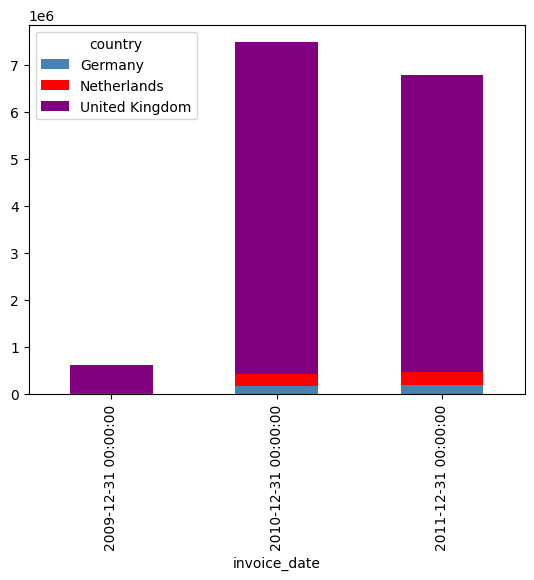

In [18]:
## Bar plot is specified to be stacked and the colors are input
top3.plot(kind = "bar", stacked = True, color = ["steelblue", "red", "purple"])
plt.plot()

## Now from this plot we can:
#### * Change Axis labels
#### * Change Legend Font size
#### * Change Axis Font Size
#### * Change Axis Labels
#### * Change Legend Position

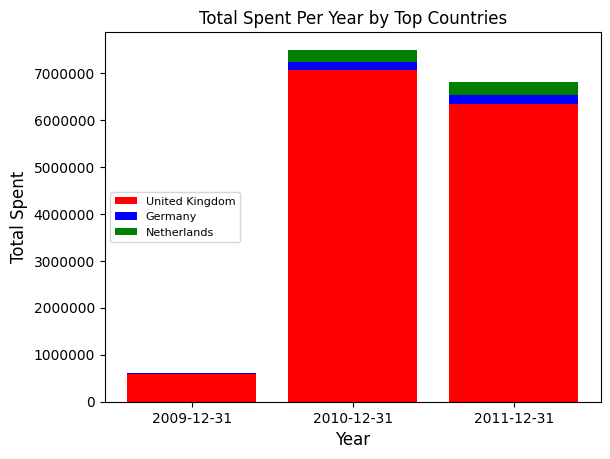

In [19]:
fig, ax = plt.subplots()
ax.bar(dates, uk, color = "r")
ax.bar(dates,germany, bottom = uk, color = "b")
ax.bar(dates, netherlands, bottom = np.add(uk, germany), color = "g")
plt.title("Total Spent Per Year by Top Countries")
plt.legend(["United Kingdom", "Germany","Netherlands"], fontsize = 8,  loc = "center left")
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Total Spent", fontsize = 12)
plt.ticklabel_format(style = "plain", useOffset = False,  axis = "y")
plt.show()

## We can plot the total income of the company as a line plot:

C:\Users\Steve\AppData\Local\Temp\ipykernel_27616\3928738601.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_totals = spending_by_country.groupby([pd.Grouper(key  ="invoice_date", freq = "M")], as_index = False).sum()


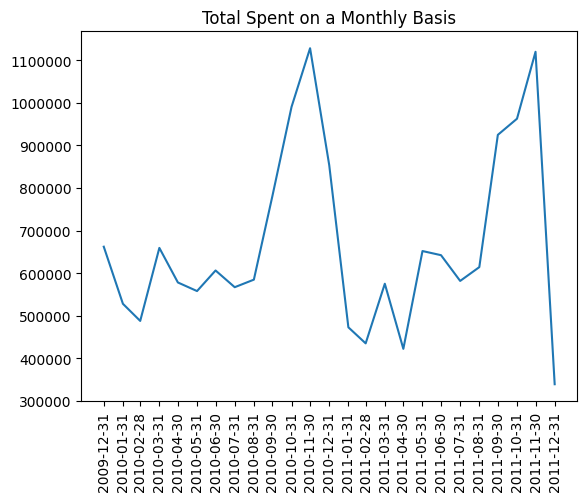

In [20]:
monthly_totals = spending_by_country.groupby([pd.Grouper(key  ="invoice_date", freq = "M")], as_index = False).sum()
plt.xticks(rotation = 90)
plt.ticklabel_format(style = "plain", useOffset = False, axis = "y")
plt.plot(monthly_totals["invoice_date"], monthly_totals["total_cost"])
plt.xticks(monthly_totals["invoice_date"])
plt.title("Total Spent on a Monthly Basis")
plt.show()

## Part 2: Plotting with Seaborn

## I looked into it, and seaborn actaully doesn't support stacked bar plots so I have left the plot as is:

[]

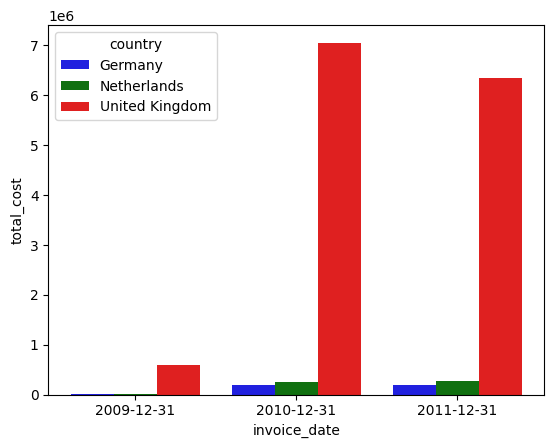

In [37]:
## Plotting with sns is much easier. There is far less data preparations that go into it
plt.legend(["United Kingdom", "Germany","Netherlands"], fontsize = 8,  loc = "center left")
sns.barplot(data = yearly_totals[yearly_totals["country"].isin(["United Kingdom","Germany","Netherlands"])], x = "invoice_date", y= "total_cost", hue = "country", palette=["blue","green", "red"])
plt.plot()

## We can plot a line in a similar way to matplot:

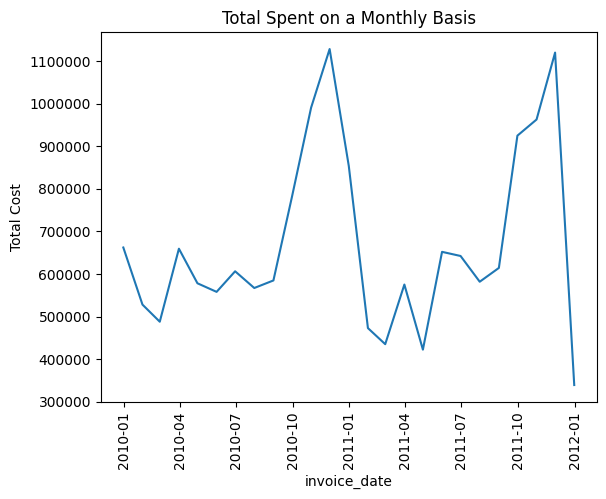

In [22]:
sns.lineplot(data = monthly_totals, x= "invoice_date", y = "total_cost")
plt.xticks(rotation = 90)
plt.title("Total Spent on a Monthly Basis")
plt.ylabel("Total Cost")
plt.ticklabel_format(style = "plain", useOffset = False, axis = "y")
plt.show()

In [23]:
df.head()

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country,year,total_cost
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,2009-2010,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,2009-2010,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,2009-2010,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,2009-2010,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,2009-2010,30.0


## Most Products are ordered less than 200 times total. The distribution of amounts of products ordered isn't normal, it is centered around the lower values

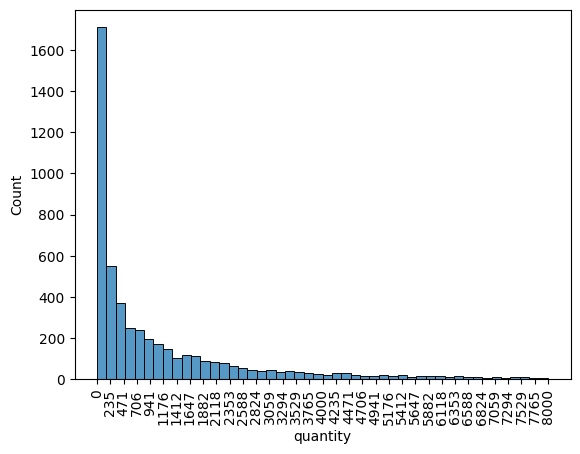

In [24]:
## We can plot a histogram and narrow the range so that the majority of the data is on the visual. The ticks are changed to give a better idea of the range of the bins
ns.histplot(data = df.groupby("description").sum("quantity"),x ="quantity", binrange=(0,8000))
plt.xticks(np.linspace(start = 0 , stop = 8000, num =35), rotation  =90)
plt.title("Quantity Distribution of Items")
plt.show()

## It is the same situation with the amount that is spent per product

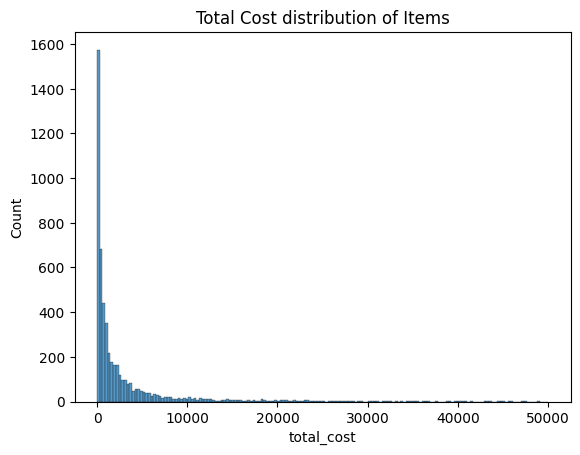

In [38]:
## Same as before but with the total spent on each product
sns.histplot(data = df.groupby("description").sum("total_cost"),x ="total_cost", binrange=(0,50000))
plt.title("Total Cost distribution of Items")
plt.show()

In [26]:
mean = df.groupby("description").mean("price")

## The prices for products are closer to a normal distribution

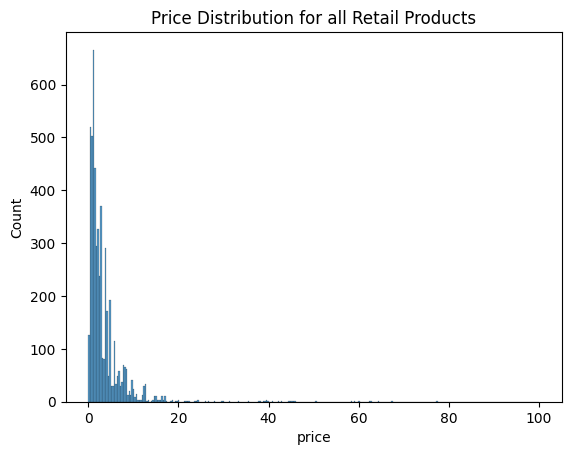

In [39]:
## Now the price of each product
sns.histplot(data = mean, x ="price",binrange=(0,100))
plt.title("Price Distribution for all Retail Products")
plt.show()

## Part 3:

## Seaborn is a package that is built on matplot, so there are many similarities between them. I would say that seaborn is better at intuiting what you are trying to accomplish, without explicitly specifying it. Matplot requires data to be structured in a more specific format if you want to change things in the plot. For the stacked bar plot I had to create a container for each of the countries, as well as the dates that were to be shown on the x-axis. I tried methods without doing this and the bar plot never came out right. Overall seaborn was easier to use, but there was a loss of functionality since I couldn't find a stacked bar plot feature.

# Conclusions  

## * Of the top 3 countries buying these retail products, England spends more by several orders of magnitude
## * The distribution of the total spent and quantity of products ordered doesn't follow a normal distribution, and is mostly weighted towards the lower end while the prices of products more closely follows the normal distribution
## * There is a seasonality element of the amount of income that the retail company makes. Most of the money spent on orders is during the holiday season